# Fashion MNIST - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Fashion MNIST Data_Set Load & Review

> ## 1) Load Fashion MNIST Data_Set

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


* Train_Data Information

In [5]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


* Test_Data Information

In [6]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


> ## 2) Visualization

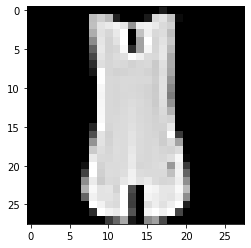

In [7]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [8]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 189 206 187  32   0   0   0  26 217 226 196  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 192 227 234 243 230 147 239 242 234 218 209   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 173 225 215 233 254   0 194 240 217 221 190   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 139 229 212 226 255   0 162 255 213 226 200   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98 232 211 215 249  46 162 246 214 230 186   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  70 228 213 220 224 252 239 219 217 231 171   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45 222 214 218 216 210 215 217 202 224 172   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24 254 214 210 211 214 215 212 203 221 167   

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [9]:
X_train = X_train.reshape((60000,28*28))
X_test = X_test.reshape((10000,28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normalization

In [10]:
X_train = X_train.astype(float) /255
X_test = X_test.astype(float)/255

In [11]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10196078 0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.74117647 0.80784314 0.73333333
 0.1254902  0.         0.         0.         0.10196078 0.85098039 0.88627451 0.76862745 0.04313725 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.75294118
 0.89019608 0.91764706 0.95294118 0.90196078 0.57647059 0.9372549  0.94901961 0.91764706 0.85490196 0.81960784 0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.67843137 0.8823529

> ## 2) One Hot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [17]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [18]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [19]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)


Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.5667 - accuracy: 0.7937 - val_loss: 0.4157 - val_accuracy: 0.8422
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3857 - accuracy: 0.8573 - val_loss: 0.3543 - val_accuracy: 0.8684
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3433 - accuracy: 0.8724 - val_loss: 0.3526 - val_accuracy: 0.8741
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3156 - accuracy: 0.8833 - val_loss: 0.3672 - val_accuracy: 0.8668
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2955 - accuracy: 0.8900 - val_loss: 0.3451 - val_accuracy: 0.8793
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2801 - accuracy: 0.8956 - val_loss: 0.3971 - val_accuracy: 0.8715
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2668 - accuracy: 0.9006 - val_loss: 0.3241 - val_accuracy: 0.8892

> ## 4) 학습 결과 시각화

* Loss Visualization

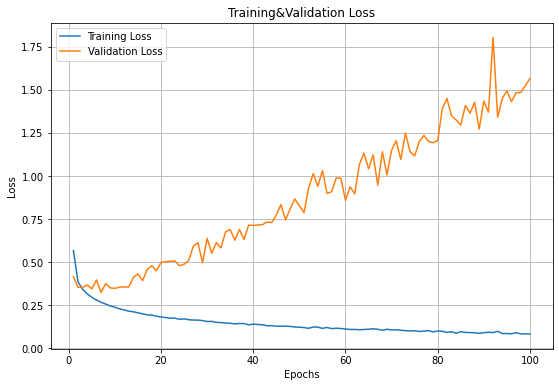

In [20]:
epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
#plt.ylim(0,0.25)
plt.title('Training&Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [21]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 1.7249 - accuracy: 0.8858
Loss = 1.72488
Accuracy = 0.88580


> ## 6) Model Predict

* Probability

In [22]:
np.set_printoptions(suppress = True, precision = 9)
print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


* Class

In [23]:
print(np.argmax(mnist.predict(X_test[:1,:])))

9


# 
# 
# 
# The End
# 
# 
# 